# Defining the Question
The data collected focused on Thyroid patients which we are supposed to use to an answer the analytic question which is to; Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


# Metric for success

Success will be achieved by coming up with a model that will help determine whether or not the patient's symptoms indicate that the patient has hypothyroid

# Understanding the Context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. The data collected had 28 columns of data eg. sex, age, status,FTI which are factors that may affect Thyroid,ours is to determine the possibility of having depending on the factors provided.

# Experimantal design 

We will be conducting Exploratory data analysis(EDA), decision trees, Random forest, Ada boosting and support vector machine which involves linear, RBF, polynomial and sigmoid steps to get the relationships and differences between different variables hence coming up with a model to determie whether or not the patient's symptoms indicate that the patient has hypothroid


# Reading the data

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# previewing the data
df = pd.read_csv('http://bit.ly/hypothyroid_data')
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


# Checking the data

In [3]:
# checking for null values
df.isnull().any().sum()

0

In [4]:
# checking the shape of our data
df.shape

(3163, 26)

In [5]:
# checking for duplicates
df.duplicated().sum()

77

In [6]:
# checking the columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [7]:
# checking for data types
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

# Tidying the dataset

In [8]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

Outliers and anomalies

In this dataset we can not deal for outliers since most of the columns are binary with either true or false or yes or no, with the sex column having male or female which have all been encoded to 0 and 1.
The age column can also not have outliers, it lies between 1 being the minimum and 98 being the maximum.

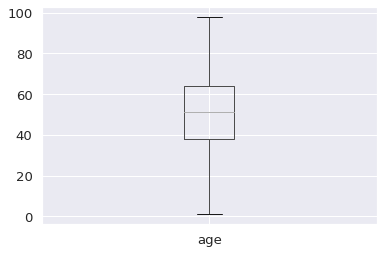

In [75]:
# Boxplot
df.boxplot(column=['age'])

# No outliers

In [10]:
# Replacing missing values(?) wiht na, since they are not significant

#

df.replace('?', np.nan, inplace=True)

In [11]:
# Checking the null values again
df.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [12]:
# Preview of our dataset to see whether the ? have been replaced with na
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [13]:
# Information on the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3086 non-null   object
 1   age                        2648 non-null   object
 2   sex                        3013 non-null   object
 3   on_thyroxine               3086 non-null   object
 4   query_on_thyroxine         3086 non-null   object
 5   on_antithyroid_medication  3086 non-null   object
 6   thyroid_surgery            3086 non-null   object
 7   query_hypothyroid          3086 non-null   object
 8   query_hyperthyroid         3086 non-null   object
 9   pregnant                   3086 non-null   object
 10  sick                       3086 non-null   object
 11  tumor                      3086 non-null   object
 12  lithium                    3086 non-null   object
 13  goitre                     3086 non-null   object
 14  TSH_meas

In [14]:
# Using apply method  
df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI' ]] = df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].apply(pd.to_numeric)

In [15]:
# Filling missing values in the sex column with mode
#
df.sex.fillna(df.sex.mode()[0], inplace = True)

In [16]:
df.isnull().sum()

status                          0
age                           438
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [17]:
# Dropping the TBG column it has many missing values 
df = df.drop('TBG', axis = 1)

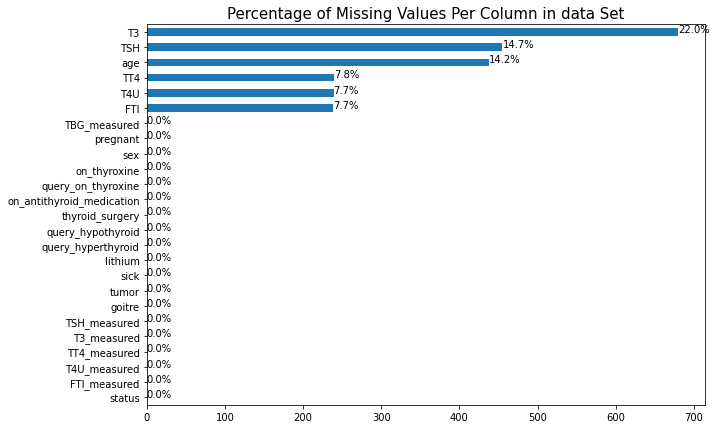

In [18]:
# Check if there missing values in df set
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in data Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [19]:
# A for loop has been used for efficiency
# Replacing the NA values in the columns listed with mean
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for column in num_cols:
  df[column].fillna(df[column].mean(), inplace = True)

In [20]:
# Checking for missing values to make sure that they have been replaced
df.isnull().sum()


# missing values have successfully been replaced

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [21]:
# Checking the new shape of our dataset
df.shape

(3086, 25)

In [22]:
# Encoding the columns to ease the work when doing analysis and prediction
# ecoding true to 0 and false to 1
# encoding y to 0 and n to 1

df = df.replace({'f':1, 't':0})
df = df.replace({'n':1, 'y':0})
df = df.replace({'F':1, 'M':0})
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,0,1,1,1,1,1,1,1,1,1,1,1,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,1
1,hypothyroid,15.0,1,0,1,1,1,1,1,1,1,1,1,1,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,1
2,hypothyroid,24.0,0,1,1,1,1,1,1,1,1,1,1,1,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,1
3,hypothyroid,24.0,1,1,1,1,1,1,1,1,1,1,1,1,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,1
4,hypothyroid,77.0,0,1,1,1,1,1,1,1,1,1,1,1,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,1,1,1,1,1,1,1,1,1,1,1,1,0,5.8,0,1.7,0,86.0,0,0.91,0,95.0,1
3159,negative,29.0,1,1,1,1,1,1,1,1,1,1,1,1,0,0.8,0,1.8,0,99.0,0,1.01,0,98.0,1
3160,negative,77.0,0,1,1,1,1,1,1,1,1,1,1,1,0,1.2,0,0.6,0,71.0,0,0.68,0,104.0,1
3161,negative,74.0,1,1,1,1,1,1,1,1,1,1,1,1,0,1.3,0,0.1,0,65.0,0,0.48,0,137.0,1


# Expoloratoty Data Analysis

In [23]:
# Value counts of the goitre column

df['goitre'].value_counts()

# 2990 patients have no goitre while only 96 have goitre

1    2990
0      96
Name: goitre, dtype: int64

In [24]:
# Value counts of the sex columns
df['sex'].value_counts()

# females are 2192 while males are 894

1    2192
0     894
Name: sex, dtype: int64

In [25]:
# value counts for the sick status
df['sick'].value_counts()

# out of the whole population only 97 patients have hypothyroid

1    2989
0      97
Name: sick, dtype: int64

In [26]:
# Measures of central tendancies using the describe function
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.00000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,0.710305,0.855476,0.982178,0.986390,0.966623,0.923850,0.923850,0.980233,0.968568,0.987038,0.999352,0.968892,0.147440,5.809320,0.22035,1.933666,0.077771,108.706922,0.077447,0.977559,0.077122,115.489080,0.918665
std,17.854431,0.453694,0.351677,0.132327,0.115883,0.179647,0.265282,0.265282,0.139220,0.174511,0.113128,0.025453,0.173638,0.354602,22.180994,0.41455,0.864826,0.267854,42.836471,0.267342,0.216873,0.266829,57.780967,0.273393
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.500000,0.000000,85.000000,0.000000,0.860000,0.000000,92.000000,1.000000
50%,51.112538,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.933666,0.000000,107.000000,0.000000,0.977559,0.000000,110.000000,1.000000
75%,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.809320,0.00000,2.200000,0.000000,124.000000,0.000000,1.050000,0.000000,126.000000,1.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.00000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000


In [27]:
# Calculating measures of dispersion og age 

st_dev = df.age.std()
print('Standard Deviation:' ,st_dev)
var = df.age.var()
print('Variance:', var)
skew = df.age.skew()
print('Skewness:', skew)
kurt = df.age.kurtosis()
print('Kurtosis:',kurt)

Standard Deviation: 17.854430861173032
Variance: 318.78070137640805
Skewness: -0.18327889150126656
Kurtosis: -0.6214515094605133


In [28]:
# list of the columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [29]:
# Importing the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

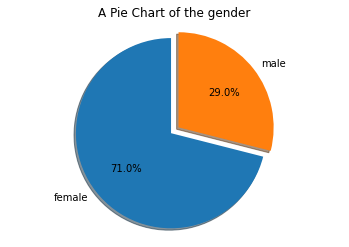

In [30]:
#Create a pie chart to indicate the sex column
column= df.sex.value_counts()


# accessing the data to plot

# labels
label= ['female','male']
# values
value = column.values

# plotting the pie chart
plt.pie(value, labels = label, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of the gender')
plt.show()


# the females having 71% are more than males having 29%.

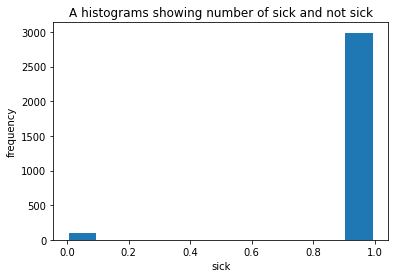

In [31]:
# Plotting a histogram of sick
sick = df['sick']
plt.hist(sick, histtype='bar', rwidth=0.9)
plt.title('A histograms showing number of sick and not sick')
plt.xlabel('sick')
plt.ylabel('frequency')
plt.show()

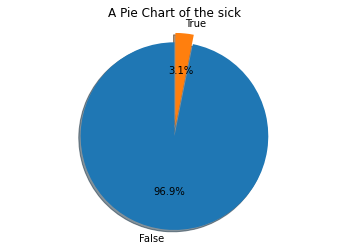

In [32]:
#Create a pie chart to indicate the day_type column
column= df.sick.value_counts()


# accessing the data to plot

# labels
label= ['False','True']
# values
value = column.values

# plotting the pie chart
plt.pie(value, labels = label, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of the sick')
plt.show()


# only 3.1% percent of the whole population has thyroid and 96.9% have no thyroid

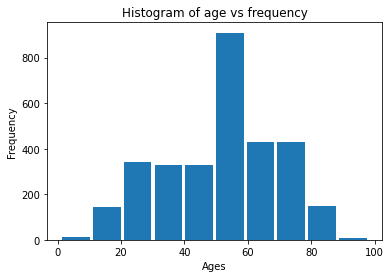

In [33]:

#Plotting a age histogram
ages = df['age']

plt.hist(ages, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()

In [ ]:
# Checking which gender was most affected by thyroids
df.groupby('sex')['age'].value_counts().unstack(level=0).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')

labels = df.groupby('sex')['age'].value_counts(normalize=True)
print(labels)
# # Rotating our x axis ticks
plt.xticks(rotation = 45)

# # Giving our chart a title
plt.title("Which gender and age are most frequent", fontsize=14, y=1.015)

# # Labeling our y axis
plt.ylabel("age", fontsize=14, labelpad=15)

# # Labeling our x axis
plt.xlabel("sex", fontsize=14, labelpad=15)

# # Displaying our chart
plt.show()

Multicolinearlity.
- Checking how different columns are correlated with each other

In [35]:
# correlations

# Correlation coefficients between -.20 and .20 are generally considered weak, 
# between .20 and .50 (positive or negative) are considered moderate, 
# and above .50 (positive or negative) are considered strong.
# calculating pearson coefficient
df.corr()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
age,1.000000,-0.008346,-0.000451,0.019781,0.059541,0.012432,-0.043156,0.087005,0.157715,-0.063078,0.063738,0.021559,0.036387,-2.027883e-01,-7.351709e-03,-1.769844e-01,-2.657425e-01,-1.268219e-01,-8.631682e-02,-1.244764e-01,-1.887859e-01,-1.250483e-01,1.773686e-02,0.129292
sex,-0.008346,1.000000,-0.118247,0.054353,-0.019527,-0.043106,-0.062156,-0.054076,-0.090688,0.024153,-0.003712,-0.016263,-0.089744,3.387231e-02,3.484748e-02,9.822571e-02,7.359567e-02,8.942875e-02,1.691698e-01,8.882570e-02,1.981428e-01,9.089841e-02,7.500181e-02,-0.090718
on_thyroxine,-0.000451,-0.118247,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,6.955339e-02,5.256796e-03,-1.616968e-01,-2.327889e-02,5.741790e-02,-2.172758e-01,5.702951e-02,-7.120897e-02,6.009429e-02,-1.133502e-01,-0.061614
query_on_thyroxine,0.019781,0.054353,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-1.097744e-01,1.467587e-02,-8.793145e-02,1.513294e-02,3.911799e-02,2.029387e-02,3.902955e-02,3.474074e-02,3.894098e-02,4.659149e-03,-0.040082
on_antithyroid_medication,0.059541,-0.019527,-0.024418,-0.015823,1.000000,-0.006256,-0.033724,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-3.003480e-02,1.045211e-03,-1.852408e-02,-6.562616e-02,-4.943343e-02,2.744886e-03,-4.967044e-02,-2.647929e-02,-4.990861e-02,1.779705e-02,0.046900
thyroid_surgery,0.012432,-0.043106,0.031370,0.015876,-0.006256,1.000000,0.001065,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,3.656718e-02,-1.216671e-02,7.382207e-03,7.011530e-03,6.806249e-03,1.612711e-02,6.594007e-03,-2.607756e-02,6.380984e-03,2.610487e-02,-0.009091
query_hypothyroid,-0.043156,-0.062156,0.066144,-0.020206,-0.033724,0.001065,1.000000,-0.017942,-0.014439,-0.051720,-0.032900,0.040694,-0.023296,5.047633e-02,-6.691075e-02,-2.422225e-02,3.898383e-02,3.775420e-02,1.095520e-02,3.747841e-02,-4.439329e-02,3.720175e-02,4.627100e-02,-0.040733
query_hyperthyroid,0.087005,-0.054076,-0.086734,-0.038674,0.124440,0.021470,-0.017942,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-1.355999e-01,2.291001e-02,-3.601245e-02,-1.693254e-01,-9.453924e-02,-1.310931e-01,-9.506823e-02,-7.002441e-02,-9.559973e-02,-6.328599e-02,0.106757
pregnant,0.157715,-0.090688,0.001219,-0.019129,0.003412,-0.013427,-0.014439,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,6.525594e-03,1.241512e-02,3.056135e-02,-2.019603e-01,-2.225238e-03,-1.712366e-01,-2.401648e-03,-3.233287e-01,-2.578747e-03,5.415269e-03,0.000328
sick,-0.063078,0.024153,-0.063480,-0.024267,-0.021160,-0.033475,-0.051720,-0.051720,-0.025581,1.000000,-0.020644,-0.004588,-0.032279,4.872396e-02,6.217587e-03,7.784726e-02,1.032679e-01,3.150925e-02,4.215426e-02,3.135117e-02,4.771029e-02,3.119264e-02,2.349841e-02,-0.033220


In [36]:
# creating a heat map showing different correlations
# the columns I want to use in the heat map are status,sex,age,FTI,TSH,query_hyperthyroid, 
# I will create a new data frame with the listed columns
df_heatmap = df.drop(columns=[ 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'])

df_heatmap.corr()



,age,sex,query_hyperthyroid
age,1.000000,-0.008346,0.087005
sex,-0.008346,1.000000,-0.054076
query_hyperthyroid,0.087005,-0.054076,1.000000


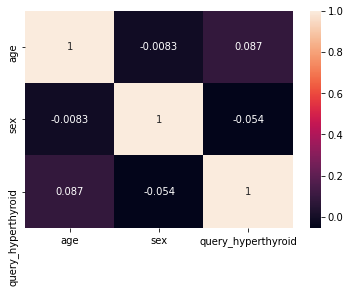

In [37]:
# Displaying the heatmap
sns.heatmap(df_heatmap.corr(),annot=True)
plt.show()

In [38]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

sex  sick
0    1       0.961969
     0       0.038031
1    1       0.971259
     0       0.028741
Name: sick, dtype: float64


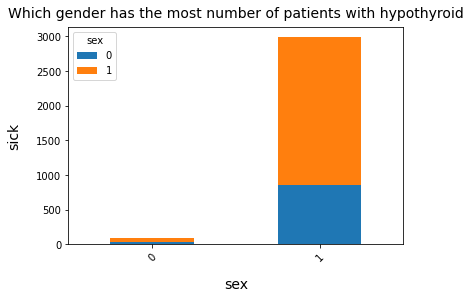

In [39]:
# Checking which gender was most affected by thyroids
df.groupby('sex')['sick'].value_counts().unstack(level=0).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')

labels = df.groupby('sex')['sick'].value_counts(normalize=True)
print(labels)
# # Rotating our x axis ticks
plt.xticks(rotation = 45)

# # Giving our chart a title
plt.title("Which gender has the most number of patients with hypothyroid", fontsize=14, y=1.015)

# # Labeling our y axis
plt.ylabel("sick", fontsize=14, labelpad=15)

# # Labeling our x axis
plt.xlabel("sex", fontsize=14, labelpad=15)

# # Displaying our chart
plt.show()

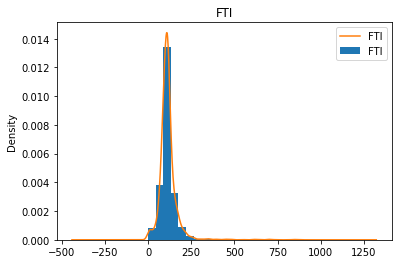

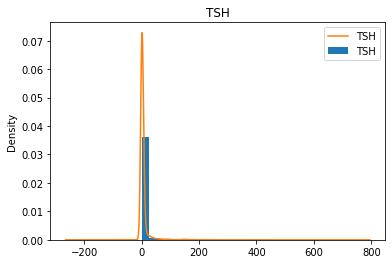

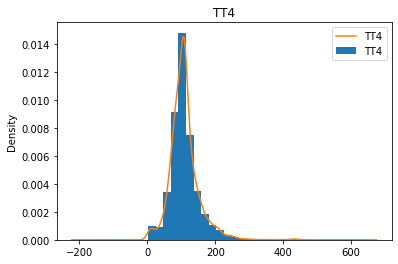

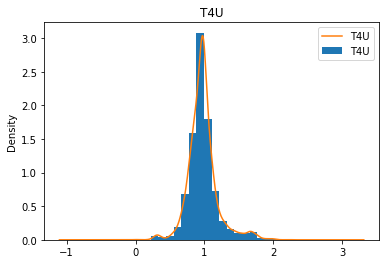

In [40]:
# plotting histograms
for column in ['FTI', 'TSH', 'TT4', 'T4U']:
  df[column].plot.hist(density = True,bins = 20)
  df[column].plot.kde(label = column)
  plt.title(column)
  plt.legend()
  plt.show()


In [41]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

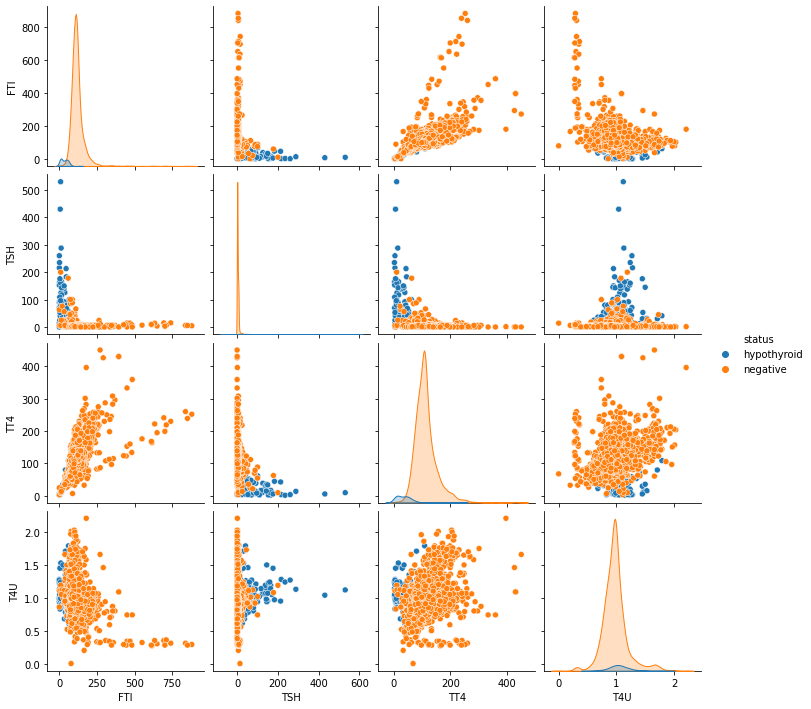

In [42]:
# pair plots
columns = ['FTI', 'TSH', 'TT4', 'T4U']

sns.pairplot(df, kind='scatter', vars=columns, hue='status')
plt.show()

# Part 1: Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = df['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9913606911447084


In [45]:
df


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,0,1,1,1,1,1,1,1,1,1,1,1,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,1
1,hypothyroid,15.0,1,0,1,1,1,1,1,1,1,1,1,1,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,1
2,hypothyroid,24.0,0,1,1,1,1,1,1,1,1,1,1,1,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,1
3,hypothyroid,24.0,1,1,1,1,1,1,1,1,1,1,1,1,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,1
4,hypothyroid,77.0,0,1,1,1,1,1,1,1,1,1,1,1,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,1,1,1,1,1,1,1,1,1,1,1,1,0,5.8,0,1.7,0,86.0,0,0.91,0,95.0,1
3159,negative,29.0,1,1,1,1,1,1,1,1,1,1,1,1,0,0.8,0,1.8,0,99.0,0,1.01,0,98.0,1
3160,negative,77.0,0,1,1,1,1,1,1,1,1,1,1,1,0,1.2,0,0.6,0,71.0,0,0.68,0,104.0,1
3161,negative,74.0,1,1,1,1,1,1,1,1,1,1,1,1,0,1.3,0,0.1,0,65.0,0,0.48,0,137.0,1


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


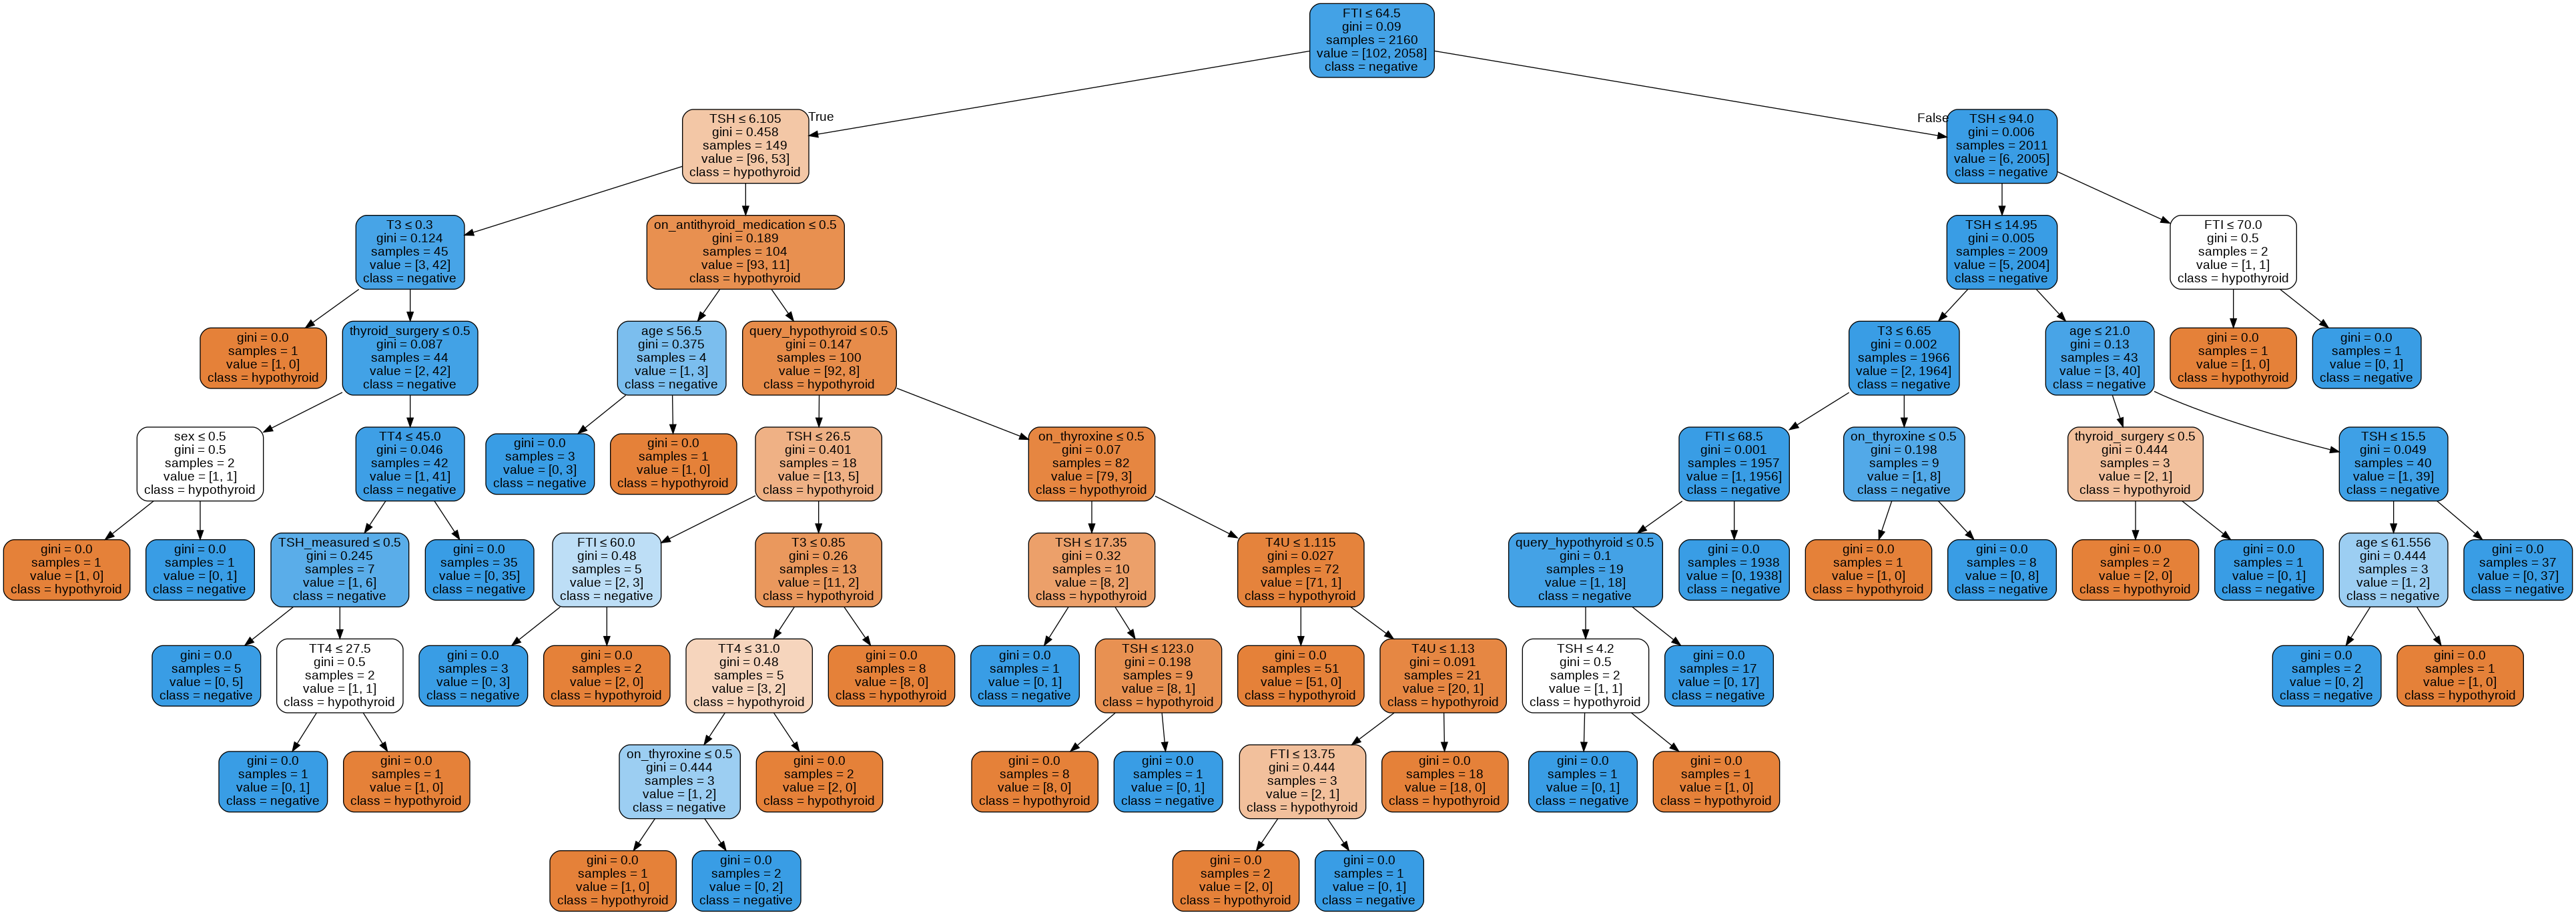

In [46]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Thyroid.png')
Image(graph.create_png())

## Random Forest

In [47]:
# Encoding the status column with hypotheroid being 1 and negative being 0
df = df.replace({'hypothyroid':1, 'negative':0})
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,0,1,1,1,1,1,1,1,1,1,1,1,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,1
1,1,15.0,1,0,1,1,1,1,1,1,1,1,1,1,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,1
2,1,24.0,0,1,1,1,1,1,1,1,1,1,1,1,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,1
3,1,24.0,1,1,1,1,1,1,1,1,1,1,1,1,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,1
4,1,77.0,0,1,1,1,1,1,1,1,1,1,1,1,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,1


In [48]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone has hypothyroid or not, so let's use that column as our Y 
y = df['status'].values


test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.042117,0.035637
std,0.200964,0.185484
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [49]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01079913606911447
Mean Squared Error: 0.01079913606911447
Root Mean Squared Error: 0.10391889178159316


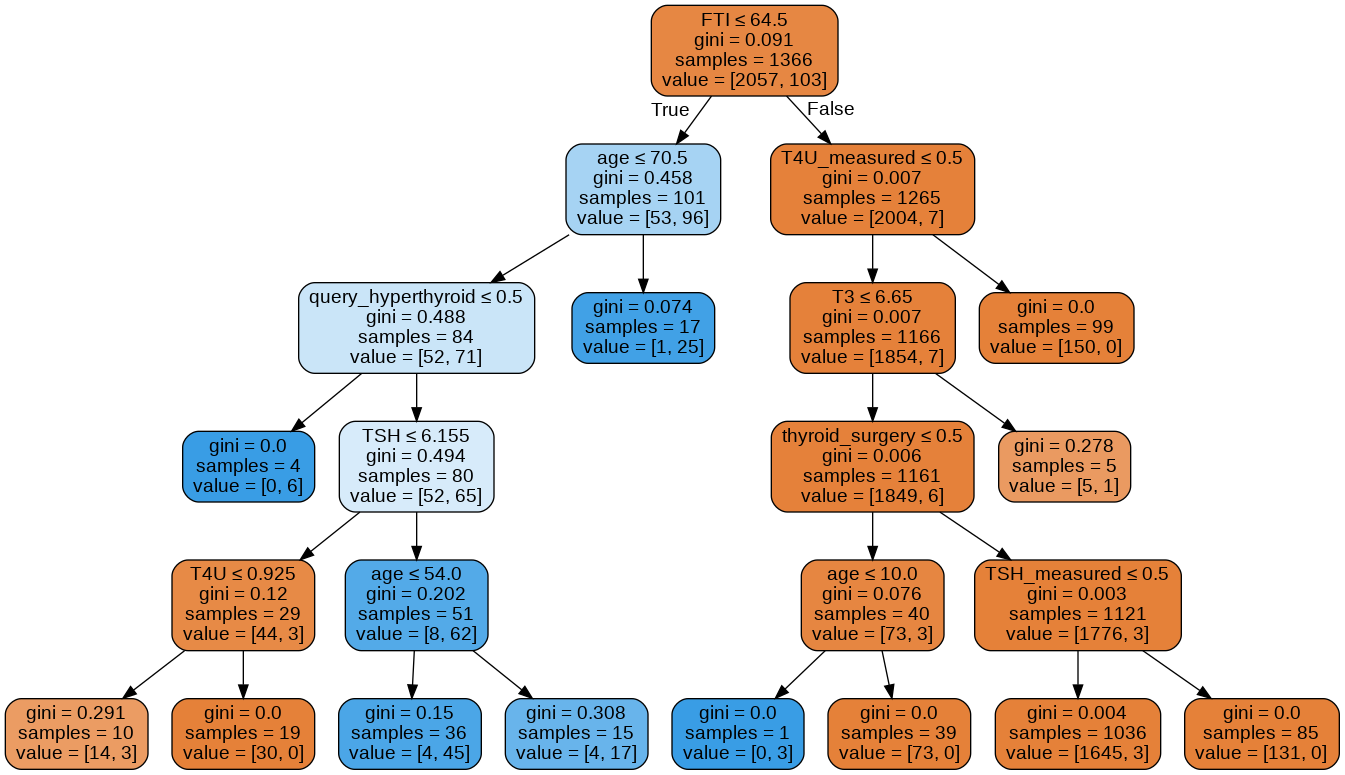

In [50]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Thyroid_forest.png')
Image(graph.create_png())

In [51]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.07), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.01), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.23), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.68), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.68
Variable: TSH                  Importance: 0.23
Variable: age                  Importance: 0.07
Variable: query_hyperthyroid   Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: pregnant       

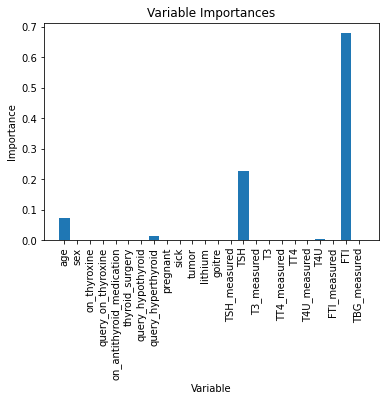

In [52]:
# Import matplotlib for plotting.
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [53]:
# calculate and print model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score

print("RandomForestClassifier Model Accuracy:", accuracy_score(y_test, y_pred))

RandomForestClassifier Model Accuracy: 0.9892008639308856


## AdaBoost 

In [54]:
y = df['status'].values


test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[test_features].values
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
# Building the adaboost model
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [56]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.978401727861771


## Gradient Booster

In [57]:
y = df['status'].values


test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[test_features].values
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

# Part 2: Support Vector Machine

## Linear

In [59]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

In [60]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,0,1,1,1,1,1,1,1,1,1,1,1,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,1
1,1,15.0,1,0,1,1,1,1,1,1,1,1,1,1,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,1
2,1,24.0,0,1,1,1,1,1,1,1,1,1,1,1,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,1
3,1,24.0,1,1,1,1,1,1,1,1,1,1,1,1,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,1
4,1,77.0,0,1,1,1,1,1,1,1,1,1,1,1,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


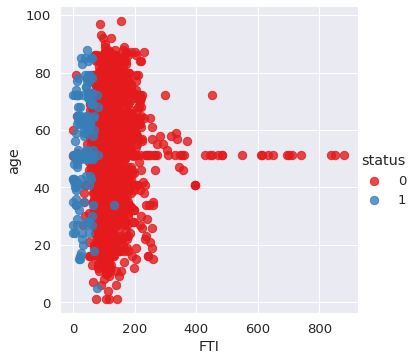

In [61]:
# We are going to use FTI and TSH as our classifying criteria. So we plot the two columns to see if we can apply svm on them
# Plot two ingredients
# 'TSH', 'age' , 'sex', 'FTI', 'query_hypothyroid'
sns.lmplot('FTI', 'age', data=df, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

## *RBF*

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


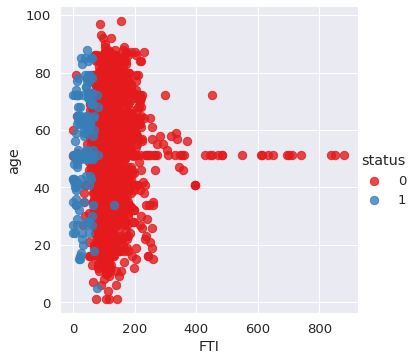

In [63]:
sns.lmplot('FTI','age', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [64]:
# splitting the data into train and test data
# Removing the target column
w = df.drop(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'TBG_measured'], axis=1)
y = df['status']
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(w)
X = pca.transform(w)
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
# building the model rbf
rbfclassifier = SVC(kernel='rbf', gamma=10.0)
# Trainign the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [67]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9611650485436893
[[593   0]
 [ 24   1]]


## Polynomial

In [68]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [70]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9870550161812298
[[592   1]
 [  7  18]]


## Sigmoid

In [71]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
# # Create a mesh grid for our graph
# def make_meshgrid(x, y, h=.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     return xx, yy

# # A function that creates the hyperplanes from our model
# def plot_contours(ax, clf, xx, yy, **params):
#     Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

# fig, ax = plt.subplots()
# # title for the plots
# title = ('Thyroid Classification with sigmoid SVC')
# # Set-up grid for plotting.
# X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# plt.show()

In [73]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [74]:
# Model Evaluation
print(accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))

0.9320388349514563
[[571  22]
 [ 20   5]]


# Challenging the solution

# Follow Up question

- Did we have the right data?
- Was the data sufficient for us to achieve our goal?
- Did we need more data?

# Conclusion

- Polynomial had the highest accuracy of 98 %,
- Followed by the RBF model with an accuracy of 96%.
- And lastly the sigmoid model with an accuracy of 93%

Random foest had an accuracy of 98%

The most effective model to use is the polynomial model since it had the highest accuracy.
